#### Data Collection
Dataset link -  https://www.kaggle.com/datasets/mrtechnical011/classification-dataset/data

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [124]:
churn_df = pd.read_csv(r'P:\ML_Projects\data\churn_data\Churn_Modelling.csv')
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [125]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


([<matplotlib.patches.Wedge at 0x1f610f50620>,
 [Text(-0.005277907522538315, 1.1999883931489437, 'France'),
  Text(-0.8386077193866204, -0.858333905298615, 'Germany'),
  Text(0.8546372651543527, -0.8423747058224675, 'Spain')],
 [Text(-0.00307877938814735, 0.6999932293368837, '50.1%'),
  Text(-0.4891878363088618, -0.5006947780908587, '25.1%'),
  Text(0.4985384046733724, -0.491385245063106, '24.8%')])

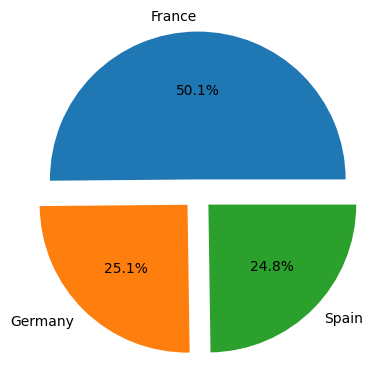

In [126]:
plt.pie(churn_df['Geography'].value_counts(),autopct='%1.1f%%',labels=churn_df['Geography'].value_counts().index,explode=[0.1,0.1,0.1])

* ploting the Gender in Pie chart

([<matplotlib.patches.Wedge at 0x1f610f77680>,
 [Text(-0.17169372599286636, 1.1876536803524362, 'Male'),
  Text(0.15738601066911445, -1.0886825265639481, 'Female')],
 [Text(-0.1001546734958387, 0.6927979802055877, '54.6%'),
  Text(0.08584691491042606, -0.5938268326712444, '45.4%')])

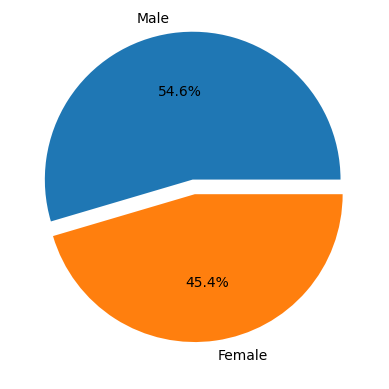

In [127]:
plt.pie(churn_df['Gender'].value_counts(),labels=churn_df['Gender'].value_counts().index,autopct='%1.1f%%',explode=[0.1,0])

* Describing the Numerical Columns

In [128]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Seperating X and Y 
* x as independent Feature
* y as dependent Feature

In [129]:
x = churn_df.iloc[:,:-1]
y = churn_df.iloc[:,-1:].values
y = y.ravel()
y.shape

(10000,)

* encoding the label for model training 
* Because the string type in not understable by model 

In [130]:
label_encoding = LabelEncoder()
x['Geography'] = label_encoding.fit_transform(x['Geography'])
x['Gender'] = label_encoding.fit_transform(x['Gender'])
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52


* spliting the data into training and test


In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6700, 13) (3300, 13) (6700,) (3300,)


In [137]:
y_train

array([1, 0, 1, ..., 1, 1, 0])

* Feature selection for scalling and modeling
* selecting only numerical column

In [138]:
scalling_features = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[scalling_features])
x_test_scaled = scaler.transform(x_test[scalling_features])

* Printing the Scaled X train and X test

In [139]:
print("x \n ",x_train_scaled,"\n \n Y \n \n ",x_test_scaled)

x 
  [[ 1.67588802  0.30112053 -1.10022343 ... -1.54618507 -1.03555714
   1.50493673]
 [ 0.30320673  0.30112053  0.9089063  ...  0.64675311  0.96566376
  -1.31177144]
 [-0.10235819  0.30112053  0.9089063  ...  0.64675311 -1.03555714
  -1.32081469]
 ...
 [ 0.86475817 -0.90192513 -1.10022343 ... -1.54618507 -1.03555714
  -0.15299072]
 [ 0.15761932 -0.90192513  0.9089063  ...  0.64675311 -1.03555714
  -0.06143595]
 [ 0.46959234  0.30112053  0.9089063  ...  0.64675311  0.96566376
  -0.82198396]] 
 
 Y 
 
  [[-0.58071682  0.30112053  0.9089063  ... -1.54618507 -1.03555714
  -1.02616335]
 [-0.29994111 -0.90192513  0.9089063  ...  0.64675311  0.96566376
   0.78471844]
 [-0.52872132  1.5041662  -1.10022343 ...  0.64675311 -1.03555714
  -0.73575756]
 ...
 [-0.65351053 -0.90192513 -1.10022343 ...  0.64675311 -1.03555714
   0.81656849]
 [-2.22377473 -0.90192513  0.9089063  ... -1.54618507  0.96566376
  -0.89395007]
 [ 0.55278515  0.30112053 -1.10022343 ... -1.54618507 -1.03555714
  -0.42439064]]


In [140]:
log_reg_model = LogisticRegression()

model_logistic = log_reg_model.fit(x_train_scaled,y_train)

In [152]:
y_pred = model_logistic.predict(x_test_scaled)
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([3111,  189]))

In [153]:
confusion_matrix(y_test,y_pred)

array([[2583,   74],
       [ 528,  115]])

### Confusion Matrix
                          Predicted 0  | Predicted 1 
     Actual 0       |   [   _TN_             _FP_     ]
     Actual 1       |   [   _FN_             _TP_     ]
    
* Acuracy score = (TP+TN) / (TP+TN+FP+FN)

* precision = TP / (TP+FP) 
    * Out off all Actual Value How many values are predicted corectly
    * Eg : Spam Classification 

* recall  =  TP / (TP+FN)
    * Out of all Predicted values How many are correctly correctly
    * Eg : Medical Prediction

* F - Beta Score  = (1 + B**2) [(Precision * Recal) / (Precision + Recall)]
    1. if FP & FN ,both are import => beta = 1
    2. if FP is more important FN , => beta = 0.25
    3. if FN >> FP , => beta = 2

In [154]:
accuracy_score(y_test,y_pred)

0.8175757575757576

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2657
           1       0.61      0.18      0.28       643

    accuracy                           0.82      3300
   macro avg       0.72      0.58      0.59      3300
weighted avg       0.79      0.82      0.77      3300



Precision = TP / (TP+FP)

In [160]:
print(precision_score(y_test,y_pred))

0.6084656084656085
